`%matplotlib inline` magic command to display matplotlib plots inline within the ipython notebook webpage

In [2]:
%matplotlib inline

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [4]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('summer-travel-gps-dbscan.csv', encoding='utf-8')

In [5]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [6]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


# Documentación de la clase FontProperties

## Clase: `matplotlib.font_manager.FontProperties`
```python
class matplotlib.font_manager.FontProperties(
    family=None, style=None, variant=None, weight=None, 
    stretch=None, size=None, fname=None, math_fontfamily=None
)
```
**Bases:** `object`

Una clase para almacenar y manipular las propiedades de las fuentes.

### Propiedades de las fuentes
Las propiedades de las fuentes son las seis propiedades descritas en la especificación de fuentes de nivel 1 de W3C CSS, además de `math_fontfamily` para las fuentes matemáticas:

1. **family**  
   Una lista de nombres de fuentes en orden decreciente de prioridad. Los elementos pueden incluir un nombre de familia de fuentes genérico, como:
   - `'sans-serif'`
   - `'serif'`
   - `'cursive'`
   - `'fantasy'`
   - `'monospace'`  
   En este caso, el tipo de letra real que se utilizará se buscará a partir del `rcParam` asociado durante el proceso de búsqueda en `findfont`.  
   **Por defecto:** `rcParams["font.family"]` (por defecto: `['sans-serif']`)

2. **style**  
   Puede ser `'normal'`, `'italic'` o `'oblique'`.  
   **Por defecto:** `rcParams["font.style"]` (por defecto: `'normal'`)

3. **variant**  
   Puede ser `'normal'` o `'small-caps'`.  
   **Por defecto:** `rcParams["font.variant"]` (por defecto: `'normal'`)

4. **stretch**  
   Un valor numérico en el rango `0-1000` o uno de los siguientes:
   - `'ultra-condensed'`
   - `'extra-condensed'`
   - `'condensed'`
   - `'semi-condensed'`
   - `'normal'`
   - `'semi-expanded'`
   - `'expanded'`
   - `'extra-expanded'`
   - `'ultra-expanded'`  
   **Por defecto:** `rcParams["font.stretch"]` (por defecto: `'normal'`)

5. **weight**  
   Un valor numérico en el rango `0-1000` o uno de los siguientes:
   - `'ultralight'`
   - `'light'`
   - `'normal'`
   - `'regular'`
   - `'book'`
   - `'medium'`
   - `'roman'`
   - `'semibold'`
   - `'demibold'`
   - `'demi'`
   - `'bold'`
   - `'heavy'`
   - `'extra bold'`
   - `'black'`  
   **Por defecto:** `rcParams["font.weight"]` (por defecto: `'normal'`)

6. **size**  
   Un valor relativo como:
   - `'xx-small'`
   - `'x-small'`
   - `'small'`
   - `'medium'`
   - `'large'`
   - `'x-large'`
   - `'xx-large'`  
   O un tamaño de fuente absoluto, por ejemplo, `10`.  
   **Por defecto:** `rcParams["font.size"]` (por defecto: `10.0`)

7. **math_fontfamily**  
   La familia de fuentes utilizada para renderizar el texto matemático. Los valores soportados son:
   - `'dejavusans'`
   - `'dejavuserif'`
   - `'cm'`
   - `'stix'`
   - `'stixsans'`
   - `'custom'`  
   **Por defecto:** `rcParams["mathtext.fontset"]` (por defecto: `'dejavusans'`)

In [7]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [8]:
# get the most visited countries
countries = df['country'].value_counts()
countries

country
Spain                     646
Portugal                  256
Germany                   225
Czech Republic            130
Poland                    104
Turkey                     94
Greece                     82
Montenegro                 51
Macedonia (FYROM)          34
Croatia                    30
Kosovo                     30
Albania                    29
Bosnia and Herzegovina     26
Serbia                     15
United Kingdom              7
Name: count, dtype: int64

# Documentación de Colores en Matplotlib

Matplotlib ofrece una amplia variedad de opciones para trabajar con colores en gráficos. A continuación, se describen las principales formas de especificar colores y las herramientas disponibles para personalizar gráficos.

## Especificación de Colores

1. **Nombres de colores**  
    Matplotlib soporta nombres de colores predefinidos. Ejemplo:
    ```python
    plt.plot(x, y, color='blue')
    ```

2. **Códigos Hexadecimales**  
    Los colores pueden especificarse usando códigos hexadecimales. Ejemplo:
    ```python
    plt.plot(x, y, color='#FF5733')  # Un tono de naranja
    ```

3. **RGB y RGBA**  
    Los colores pueden definirse como tuplas de valores RGB o RGBA, donde cada componente está en el rango `[0, 1]`. Ejemplo:
    ```python
    plt.plot(x, y, color=(0.1, 0.2, 0.5))  # RGB
    plt.plot(x, y, color=(0.1, 0.2, 0.5, 0.8))  # RGBA
    ```

4. **Escalas de grises**  
    Se puede usar un valor en el rango `[0, 1]` para especificar un color en escala de grises. Ejemplo:
    ```python
    plt.plot(x, y, color='0.5')  # Gris medio
    ```

5. **Mapas de colores (Colormaps)**  
    Matplotlib incluye mapas de colores predefinidos que pueden aplicarse a gráficos. Ejemplo:
    ```python
    plt.scatter(x, y, c=z, cmap='viridis')
    ```

## Mapas de Colores (Colormaps)

Los mapas de colores son útiles para representar datos continuos o categóricos. Algunos mapas de colores populares incluyen:

- **Perceptualmente Uniformes** (recomendados para datos continuos):
  - `'viridis'`
  - `'plasma'`
  - `'cividis'`
  - `'inferno'`

- **Secuenciales**:
  - `'Blues'`
  - `'Greens'`
  - `'Oranges'`

- **Divergentes**:
  - `'coolwarm'`
  - `'bwr'`
  - `'seismic'`

- **Categóricos**:
  - `'tab10'`
  - `'Set1'`
  - `'Pastel1'`

Ejemplo de uso:
```python
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

plt.scatter(x, y, c=z, cmap='viridis')
plt.colorbar()  # Añade una barra de color
plt.show()
```

## Transparencia (Alpha)

El parámetro `alpha` controla la transparencia de los colores. Su valor está en el rango `[0, 1]`, donde `0` es completamente transparente y `1` es completamente opaco. Ejemplo:
```python
plt.plot(x, y, color='blue', alpha=0.5)
```

## Herramientas Útiles

1. **Visualización de Mapas de Colores**  
    Para visualizar todos los mapas de colores disponibles:
    ```python
    from matplotlib import cm
    import matplotlib.pyplot as plt

    colormaps = [m for m in cm.cmap_d]
    print(colormaps)
    ```

2. **Personalización de Colores**  
    Puedes definir tus propios colores o mapas de colores utilizando `LinearSegmentedColormap` o `ListedColormap`.

    Ejemplo de un mapa de colores personalizado:
    ```python
    from matplotlib.colors import ListedColormap

    custom_cmap = ListedColormap(['red', 'green', 'blue'])
    plt.scatter(x, y, c=z, cmap=custom_cmap)
    plt.show()
    ```

Con estas herramientas, puedes personalizar completamente los colores en tus gráficos de Matplotlib.

<Axes: xlabel='country'>

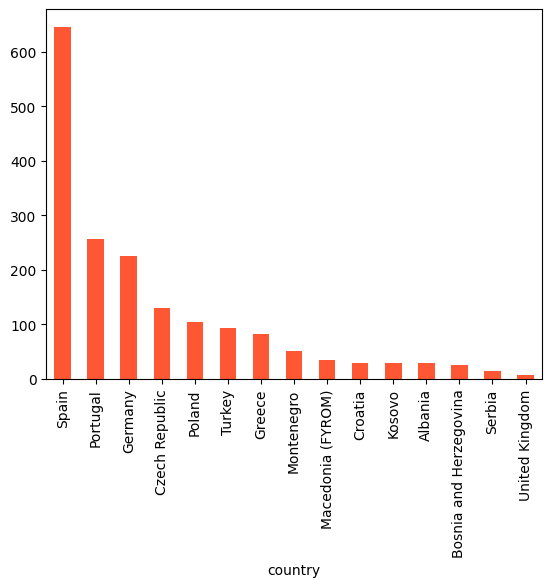

In [9]:
# default matplotlib bar chart
countries.plot(kind='bar', color='#FF5733')

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

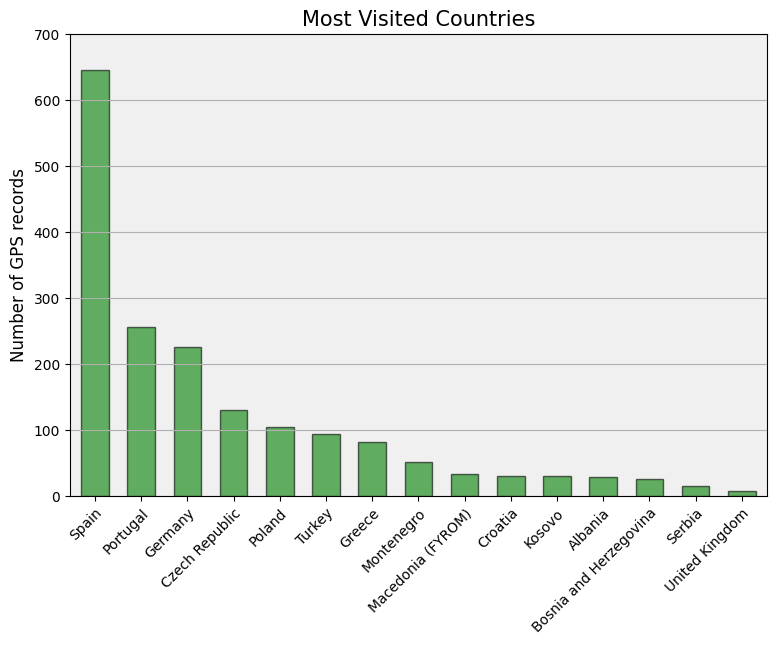

In [10]:
# style the chart to make it look nicer
ax = countries.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[0, 700])

ax.set_xticklabels(countries.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_facecolor(axis_bgcolor)   
ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

In [11]:
# make a re-usable function to draw nice bar charts
def bar_chart(data, title='', xlabel='', ylabel='', color='k', ylim=None):
    
    ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                   color=color, edgecolor='k', grid=False, ylim=ylim)

    ax.set_xticklabels(data.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    ax.set_facecolor(axis_bgcolor)   
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=label_font)
    ax.set_ylabel(ylabel, fontproperties=label_font)

    plt.show()

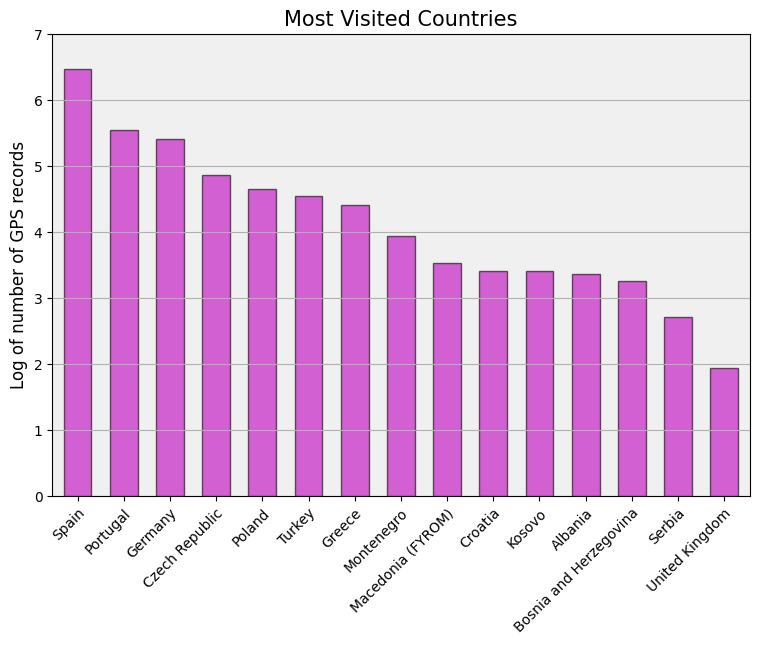

In [12]:
# let's re-scale the data and use our new function
log_countries = np.log(df['country'].value_counts())

# Extra
# Update the font family to a commonly available font like 'DejaVu Sans'
title_font.set_family('DejaVu Sans')
label_font.set_family('DejaVu Sans')
ticks_font.set_family('DejaVu Sans')
annotation_font.set_family('DejaVu Sans')

# Call the bar_chart function with the updated fonts
bar_chart(data=log_countries, 
          title='Most Visited Countries', 
          ylabel='Log of number of GPS records', 
          color='m', 
          ylim=[0,7])

In [13]:
# do the same thing, but now for the most visited cities instead of countries
cities = df['city'].value_counts().head(13)
cities

city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Athens        67
Porto         58
Krakow        58
Freiburg      54
Kotor         51
Ohrid         34
Prizren       30
Berat         27
Name: count, dtype: int64

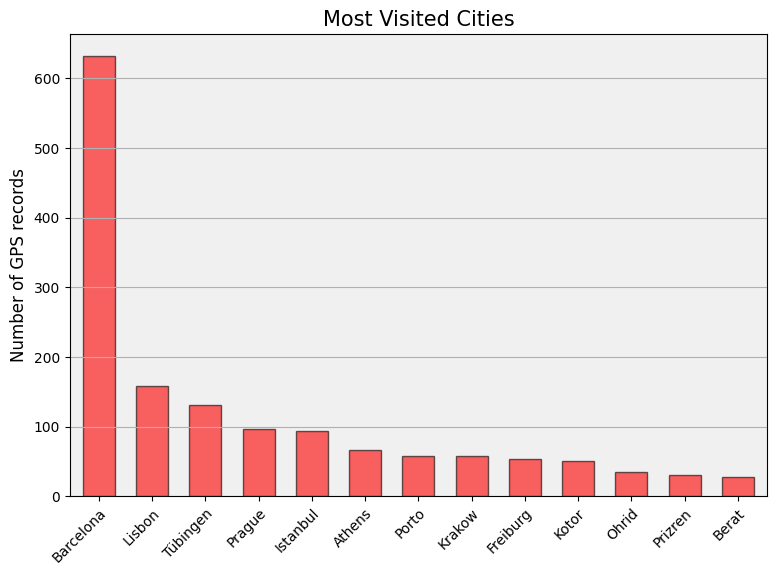

In [14]:
title = 'Most Visited Cities'
ylabel = 'Number of GPS records'
color = 'r'
bar_chart(cities, title=title, ylabel=ylabel, color=color)

In [15]:
df

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom
...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany


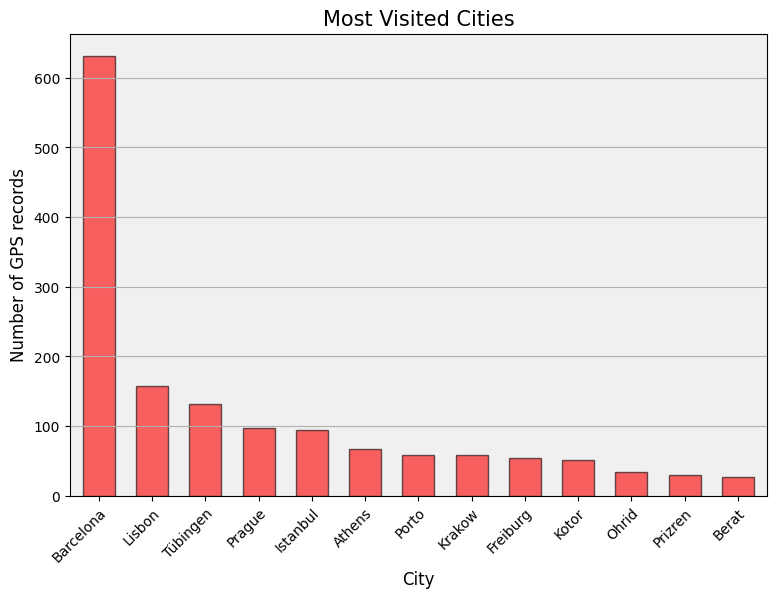

In [16]:
title = 'Most Visited Cities'
ylabel = 'Number of GPS records'
xlabel = 'City'
color = 'r'
bar_chart(cities, title=title, ylabel=ylabel, xlabel=xlabel, color=color)

##### Next: scatter plots as simple maps

<Axes: xlabel='lon', ylabel='lat'>

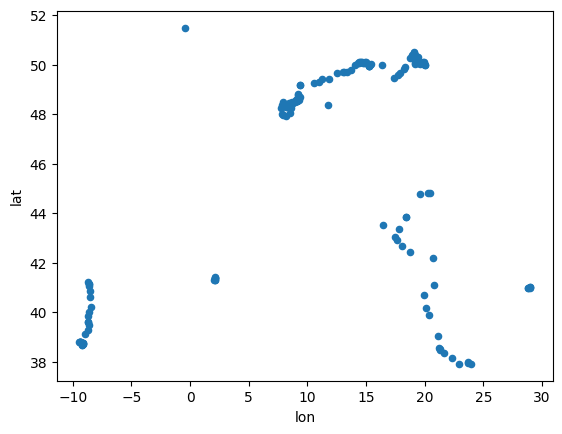

In [17]:
# scatter plot the longitude and latitude data, with matplotlib defaults
rs.plot(kind='scatter', x='lon', y='lat')

### Obtener un punto representativo para cada una de las ciudades más visitadas

Este fragmento de código selecciona un único punto representativo de los datos para cada una de las ciudades más visitadas. A continuación, se detalla el proceso:

1. **Identificar las ciudades más visitadas**  
    Se utiliza el método `value_counts()` para contar la cantidad de registros por ciudad en el DataFrame `df`. Luego, con `head(8)` se seleccionan las 8 ciudades más visitadas y se obtiene su índice (nombres de las ciudades) con `.index`.  
    ```python
    most_visited_cities_index = df['city'].value_counts().head(8).index
    ```

2. **Filtrar los datos para incluir solo las ciudades más visitadas**  
    Se crea un nuevo DataFrame `most_visited_cities` que contiene únicamente las filas de `df` correspondientes a las ciudades más visitadas. Esto se logra utilizando el método `.isin()` para filtrar las filas donde la columna `city` coincide con los nombres de las ciudades más visitadas.  
    ```python
    most_visited_cities = pd.DataFrame(df[df['city'].isin(most_visited_cities_index)])
    ```

3. **Eliminar duplicados para obtener un único punto por ciudad**  
    Se eliminan las filas duplicadas en el DataFrame `most_visited_cities`, manteniendo solo la primera aparición de cada ciudad. Esto asegura que cada ciudad esté representada por un único punto en el conjunto de datos.  
    ```python
    most_visited_cities.drop_duplicates(subset=['city'], keep='first', inplace=True)
    ```

4. **Resultado**  
    El DataFrame `most_visited_cities` contiene un único punto representativo para cada una de las 8 ciudades más visitadas, con las columnas `lat` (latitud), `lon` (longitud), `city` (nombre de la ciudad) y `country` (país).

#### Código completo:
```python
# Obtener un punto representativo para cada una de las ciudades más visitadas
most_visited_cities_index = df['city'].value_counts().head(8).index
most_visited_cities = pd.DataFrame(df[df['city'].isin(most_visited_cities_index)])
most_visited_cities.drop_duplicates(subset=['city'], keep='first', inplace=True)
most_visited_cities
```

In [18]:
# get a single representative point from the data set for each of the most visited cities
most_visited_cities_index = df['city'].value_counts().head(8).index
most_visited_cities = pd.DataFrame(df[df['city'].isin(most_visited_cities_index)])
most_visited_cities.drop_duplicates(subset=['city'], keep='first', inplace=True)
most_visited_cities

,lat,lon,city,country
date,,,,
2014-05-14 15:11:00,38.781775,-9.137544,Lisbon,Portugal
2014-05-17 15:13:00,41.145266,-8.610441,Porto,Portugal
2014-05-19 00:04:00,41.377119,2.151632,Barcelona,Spain
2014-05-30 17:59:00,50.097330,19.895394,Krakow,Poland
2014-06-02 12:10:00,50.087729,14.660600,Prague,Czech Republic
2014-06-06 19:06:00,48.518270,9.058023,Tübingen,Germany
2014-07-05 05:32:00,37.967669,23.729203,Athens,Greece
2014-07-06 20:42:00,40.982352,28.815756,Istanbul,Turkey


### Documentación del Código: Visualización de Ciudades Más Visitadas en un Mapa de Dispersión

Este código genera un gráfico de dispersión que representa las ciudades más visitadas en un mapa, utilizando sus coordenadas de longitud y latitud. Además, se anotan los nombres de las ciudades en el gráfico.

#### Pasos del Código:

1. **Crear la Figura y los Ejes**  
    Se crea una figura (`fig`) y un conjunto de ejes (`ax`) para el gráfico. El tamaño de la figura se establece en 10x6 pulgadas.
    ```python
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    ```

2. **Graficar los Puntos**  
    Se utiliza el método `scatter` para graficar los puntos correspondientes a las coordenadas de longitud (`lon`) y latitud (`lat`) del DataFrame `rs`.  
    - `c='m'`: Color de los puntos (magenta).  
    - `edgecolor='k'`: Color del borde de los puntos (negro).  
    - `alpha=.4`: Transparencia de los puntos (40%).  
    - `s=150`: Tamaño de los puntos.  
    ```python
    rs_scatter = ax.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)
    ```

3. **Configurar las Etiquetas de los Ejes**  
    Se establece la fuente de las etiquetas de los ejes X e Y utilizando la propiedad `ticks_font`.
    ```python
    for label in ax.get_xticklabels():
         label.set_fontproperties(ticks_font)
    for label in ax.get_yticklabels():
         label.set_fontproperties(ticks_font)
    ```

4. **Configurar el Título, Etiquetas de los Ejes y Fondo**  
    - Se establece el título del gráfico con la fuente `title_font`.  
    - Se configuran las etiquetas de los ejes X e Y con la fuente `label_font`.  
    - Se establece el color de fondo del gráfico con `axis_bgcolor`.  
    ```python
    ax.set_title('Most Visited Cities', fontproperties=title_font)
    ax.set_xlabel('Longitude', fontproperties=label_font)
    ax.set_ylabel('Latitude', fontproperties=label_font)
    ax.set_facecolor(axis_bgcolor)
    ```

5. **Anotar las Ciudades Más Visitadas**  
    Se anotan los nombres de las ciudades más visitadas en el gráfico utilizando las coordenadas de longitud y latitud del DataFrame `most_visited_cities`.  
    - `bbox_style`: Estilo del cuadro que rodea el texto de la anotación.  
    - `arrowprops_style`: Estilo de la flecha que conecta el texto con el punto correspondiente.  
    - `annotate_cities`: Función lambda que aplica las anotaciones a cada fila del DataFrame.  
    ```python
    bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
    arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
    annotate_cities = lambda row: ax.annotate(row['city'], 
                                                            xy=(row['lon'], row['lat']),
                                                            xytext=(row['lon'] + 1, row['lat'] + 1),
                                                            fontproperties=annotation_font,
                                                            bbox=bbox_style,
                                                            xycoords='data',
                                                            arrowprops=arrowprops_style)
    most_visited_cities.apply(annotate_cities, axis=1)
    ```

6. **Mostrar el Gráfico**  
    Finalmente, se muestra el gráfico utilizando `plt.show()`.
    ```python
    plt.show()
    ```

#### Resultado:
El gráfico muestra un mapa de dispersión con las ciudades más visitadas, anotadas con sus nombres y conectadas a sus puntos correspondientes mediante flechas.

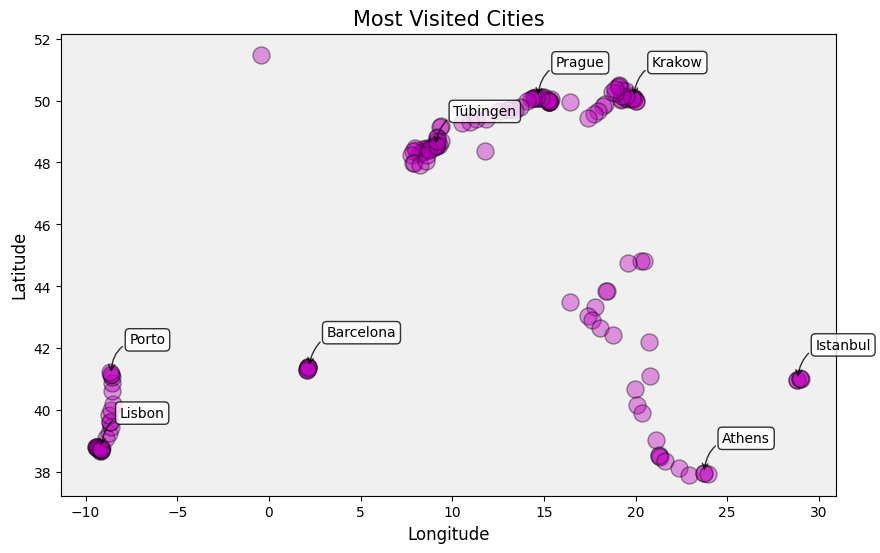

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

# set title, axis labels, background color
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)
ax.set_facecolor(axis_bgcolor)

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lon'], row['lat']),
                                          xytext=(row['lon'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
most_visited_cities.apply(annotate_cities, axis=1)
    
plt.show()

### Documentación del Código: Contar Registros por Fecha

Este fragmento de código calcula el número de registros en el DataFrame `df` agrupados por fecha y devuelve un resumen de los datos.

#### Pasos del Código:

1. **Agrupar los Datos por Fecha**  
    Se utiliza el método `groupby()` para agrupar los datos del DataFrame `df` por la fecha de su índice (`df.index.date`).  
    - `df.index.date`: Extrae únicamente la parte de la fecha (sin la hora) del índice de tipo `DatetimeIndex`.  
    - `.size()`: Calcula el número de registros en cada grupo (es decir, el número de registros por fecha).  
    ```python
    countdata = df.groupby(df.index.date).size()
    ```

#### Ejemplo de Salida:

In [20]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

<Axes: >

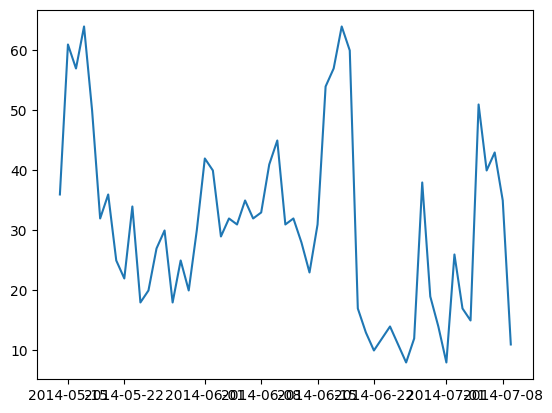

In [21]:
# default matplotlib line chart
countdata.plot(kind='line')

### Documentación del Código: Gráfico de Línea Mejorado

Este código genera un gráfico de línea que muestra el número de registros en el conjunto de datos agrupados por fecha. Además, incluye anotaciones para resaltar eventos específicos.

#### Pasos del Código:

1. **Crear la Figura y los Ejes**  
    Se crea una figura (`fig`) y un conjunto de ejes (`ax`) para el gráfico. El tamaño de la figura se establece en 10x5 pulgadas.
    ```python
    fig, ax = plt.subplots()
    ```

2. **Graficar los Datos**  
    Se utiliza el método `plot()` para graficar los datos de `countdata` como un gráfico de línea.  
    - `kind='line'`: Especifica que el gráfico es de tipo línea.  
    - `figsize=[10, 5]`: Establece el tamaño de la figura.  
    - `linewidth='3'`: Define el grosor de la línea.  
    - `alpha=0.5`: Ajusta la transparencia de la línea.  
    - `marker='o'`: Añade marcadores circulares en los puntos de datos.  
    - `color='c'`: Establece el color de la línea (cian).  
    ```python
    ax = countdata.plot(kind='line',
                              figsize=[10, 5],
                              linewidth='3', 
                              alpha=0.5,
                              marker='o',
                              color='c')
    ```

3. **Añadir Anotaciones**  
    Se añaden anotaciones para resaltar eventos específicos en el gráfico.  
    - `xy`: Coordenadas del punto a anotar.  
    - `fontproperties`: Fuente utilizada para el texto de la anotación.  
    - `bbox`: Estilo del cuadro que rodea el texto de la anotación.  
    ```python
    ax.annotate('Left the EU', 
                    xy=('2014-06-20', 60),
                    fontproperties=annotation_font,
                    bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                    xycoords='data')

    ax.annotate('Had WiFi', 
                    xy=('2014-06-23', 40),
                    fontproperties=annotation_font,
                    bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                    xycoords='data')

    ax.annotate('Return to EU', 
                    xy=('2014-07-01', 53.5),
                    fontproperties=annotation_font,
                    bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                    xycoords='data')
    ```

4. **Configurar las Etiquetas del Eje X**  
    Se establecen las etiquetas del eje X para mostrar fechas espaciadas uniformemente.  
    - `n`: Calcula el intervalo entre las marcas del eje X.  
    - `xtick_data`: Selecciona las filas espaciadas por el intervalo calculado.  
    - `set_ticks`: Establece las marcas del eje X en las fechas seleccionadas.  
    ```python
    n = len(countdata) / int(fig.get_size_inches()[0])
    xtick_data = countdata.iloc[range(0, len(countdata), 7)]
    ax.xaxis.set_ticks(xtick_data.index)
    ax.set_xlim(['2014-05-13', '2014-07-10'])
    ```

5. **Añadir Cuadrículas**  
    Se añaden cuadrículas al gráfico para facilitar la lectura de los datos.  
    ```python
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ```

6. **Configurar Etiquetas, Título y Fondo**  
    - Se configuran las etiquetas del eje X e Y con la fuente `ticks_font`.  
    - Se establece el título del gráfico con la fuente `title_font`.  
    - Se ajusta el color de fondo del gráfico con `axis_bgcolor`.  
    ```python
    ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    for label in ax.get_yticklabels():
         label.set_fontproperties(ticks_font)
    ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
    ax.set_xlabel('', fontproperties=label_font)
    ax.set_ylabel('Number of GPS records', fontproperties=label_font)
    ax.set_facecolor(axis_bgcolor)
    ```

7. **Mostrar el Gráfico**  
    Finalmente, se muestra el gráfico utilizando `plt.show()`.  
    ```python
    plt.show()
    ```

#### Resultado:
El gráfico muestra el número de registros por fecha, con anotaciones que destacan eventos importantes y un diseño mejorado para facilitar la interpretación visual.

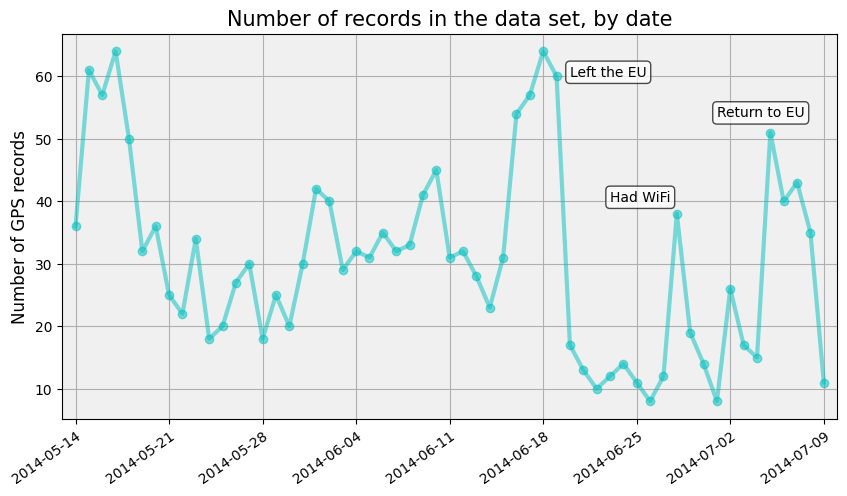

In [22]:
# create a nicer line plot
fig, ax = plt.subplots()
ax = countdata.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='c')

# add annotations for explanation
ax.annotate('Left the EU', 
                 xy=('2014-06-20', 60),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Had WiFi', 
                 xy=('2014-06-23', 40),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Return to EU', 
                 xy=('2014-07-01', 53.5),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

# set the x-ticks/labels for every nth row of the data: 1 tick mark per horizontal inch
n = len(countdata) / int(fig.get_size_inches()[0]) #interval between tick marks
xtick_data = countdata.iloc[range(0, len(countdata), 7)] #rows spaced apart by that interval (ie, weekly)
ax.xaxis.set_ticks(xtick_data.index) #set the tick labels as the dates of those rows
ax.set_xlim(['2014-05-13', '2014-07-10'])

ax.xaxis.grid(True)
ax.yaxis.grid(True)

# set tick labels, axis labels, and title
ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)
ax.set_facecolor(axis_bgcolor)

plt.show()


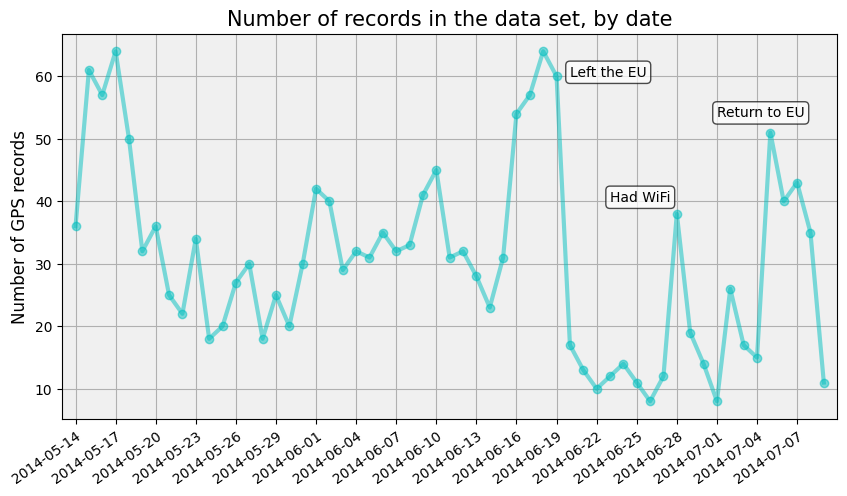

In [23]:
# create a nicer line plot
fig, ax = plt.subplots()
ax = countdata.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='c')

# add annotations for explanation
ax.annotate('Left the EU', 
                 xy=('2014-06-20', 60),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Had WiFi', 
                 xy=('2014-06-23', 40),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

ax.annotate('Return to EU', 
                 xy=('2014-07-01', 53.5),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                 xycoords='data')

# set the x-ticks/labels for every 3rd row of the data
xtick_data = countdata.iloc[range(0, len(countdata), 3)]  # rows spaced apart by 3 days
ax.xaxis.set_ticks(xtick_data.index)  # set the tick labels as the dates of those rows
ax.set_xlim(['2014-05-13', '2014-07-10'])

ax.xaxis.grid(True)
ax.yaxis.grid(True)

# set tick labels, axis labels, and title
ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)
ax.set_facecolor(axis_bgcolor)

plt.show()


# Pie charts

In [27]:
cities = df['city'].value_counts()
print(cities.count())
print(cities.head())

113
city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64


<Axes: ylabel='count'>

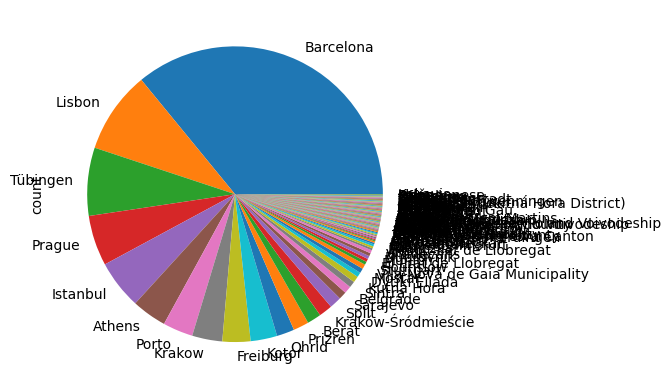

In [28]:
# draw a pie chart nightmare
cities.plot(kind='pie')

### Documentación del Código: Función para Crear Gráficos de Pastel Mejorados

Esta función genera gráficos de pastel personalizados utilizando Matplotlib. Permite ajustar diversos parámetros para mejorar la estética y funcionalidad del gráfico.

#### Parámetros de la Función

1. **`fractions`** *(obligatorio)*  
    Valores numéricos que representan las proporciones de cada segmento del gráfico de pastel.

2. **`labels`** *(obligatorio)*  
    Etiquetas asociadas a cada segmento del gráfico.

3. **`title`** *(opcional)*  
    Título del gráfico.  
    **Por defecto:** `''` (cadena vacía).

4. **`cm_name`** *(opcional)*  
    Nombre del mapa de colores de Matplotlib a utilizar.  
    **Por defecto:** `'Pastel1'`.

5. **`autopct`** *(opcional)*  
    Formato del texto que muestra los valores en cada segmento.  
    **Por defecto:** `lambda x: str(round(x, 1)) + '%'`.

6. **`labeldistance`** *(opcional)*  
    Distancia entre las etiquetas y los segmentos del gráfico.  
    **Por defecto:** `1.05`.

7. **`shadow`** *(opcional)*  
    Si se debe mostrar una sombra alrededor del gráfico.  
    **Por defecto:** `True`.

8. **`startangle`** *(opcional)*  
    Ángulo inicial para rotar el gráfico.  
    **Por defecto:** `90`.

9. **`edgecolor`** *(opcional)*  
    Color de los bordes de los segmentos.  
    **Por defecto:** `'w'` (blanco).

10. **`width`** *(opcional)*  
     Ancho de la figura en pulgadas.  
     **Por defecto:** `8`.

11. **`height`** *(opcional)*  
     Altura de la figura en pulgadas.  
     **Por defecto:** `8`.

12. **`grouping_threshold`** *(opcional)*  
     Valor mínimo para agrupar segmentos pequeños en un único segmento.  
     **Por defecto:** `None`.

13. **`grouping_label`** *(opcional)*  
     Etiqueta para el segmento agrupado.  
     **Por defecto:** `None`.

#### Funcionamiento

1. **Agrupación de Segmentos Pequeños**  
    Si se especifica `grouping_threshold`, los segmentos con valores menores a este umbral se agrupan en un único segmento llamado `'Others'` (o el valor de `grouping_label`).

2. **Asignación de Colores**  
    Se utiliza un mapa de colores de Matplotlib para asignar un color único a cada segmento.

3. **Creación del Gráfico**  
    Se utiliza `ax.pie()` para generar el gráfico de pastel con los parámetros especificados.

4. **Personalización de Bordes**  
    Se ajusta el color de los bordes de cada segmento utilizando el parámetro `edgecolor`.

5. **Título del Gráfico**  
    Se establece el título del gráfico utilizando la fuente definida en `title_font`.

6. **Visualización**  
    Se muestra el gráfico utilizando `plt.show()`.

#### Ejemplo de Uso

```python
# Datos de ejemplo
fractions = pd.Series([40, 30, 20, 10], index=['A', 'B', 'C', 'D'])

# Llamada a la función
pie_chart(fractions=fractions, 
             labels=fractions.index, 
             title='Ejemplo de Gráfico de Pastel', 
             cm_name='Set3', 
             grouping_threshold=15, 
             grouping_label='Otros')
```

#### Resultado
El gráfico generado muestra los segmentos con colores personalizados, etiquetas claras y un diseño mejorado.

In [31]:
# function to produce more beautiful pie charts with matplotlib
def pie_chart(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = lambda x: str(round(x, 1)) + '%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what to label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cut-off value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cut-off value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        # fractions = meets_threshold.append(all_others) # Deprecated in pandas 1.4.0
        fractions = pd.concat([meets_threshold, all_others])
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title, fontproperties=title_font)
    plt.show()

C:\Users\GBP17\AppData\Local\Temp\ipykernel_24284\2113586688.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap(cm_name)


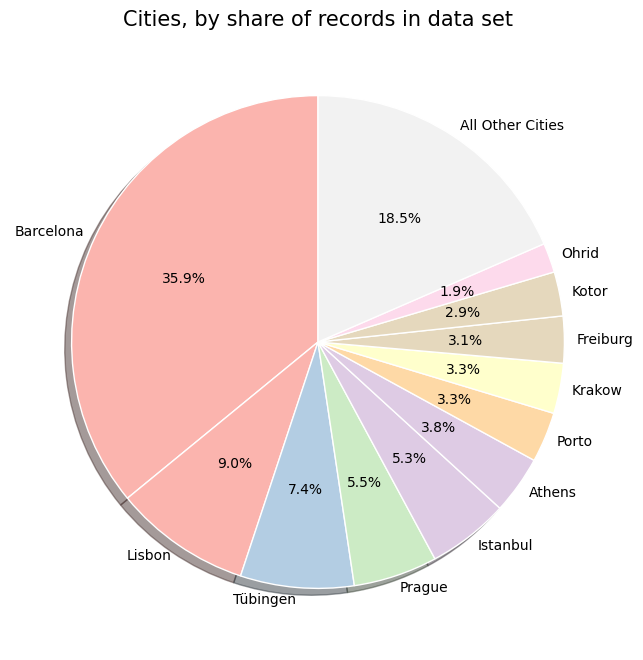

In [32]:
cities = df['city'].value_counts()

# test out our function
pie_chart(fractions = cities,
          labels = cities.index,
          title = 'Cities, by share of records in data set',
          grouping_threshold = 30,
          grouping_label = 'All Other Cities')

C:\Users\GBP17\AppData\Local\Temp\ipykernel_24284\2113586688.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap(cm_name)


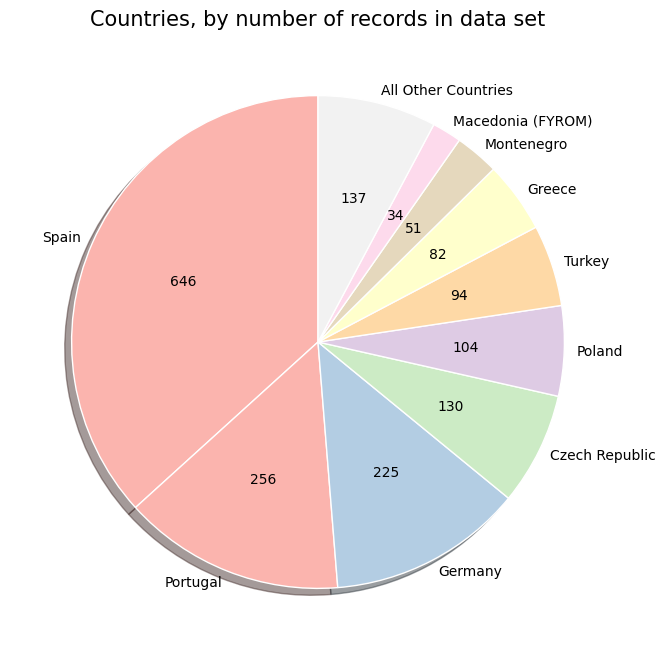

In [33]:
countries = df['country'].value_counts()

# convert the pie wedge percentage into its absolute value (instead of percent share)
def my_autopct(pct):
    total = sum(countries)
    return int(round((pct * total) / 100.))

# test out our function
pie_chart(fractions = countries,
          labels = countries.index,
          title = 'Countries, by number of records in data set',
          autopct=my_autopct, # pct = percentage of the pie wedge
          grouping_threshold = 30,
          grouping_label = 'All Other Countries')

# Uso de Scatter Matrix

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

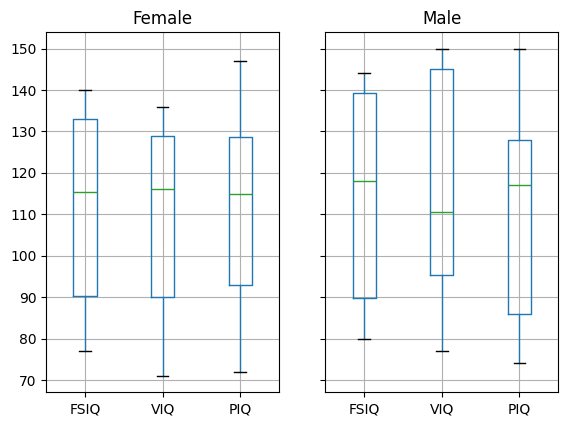

In [34]:
data = pd.read_csv('brain_size.csv', sep=';', na_values='.')
# Box plots of different columns for each gender
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

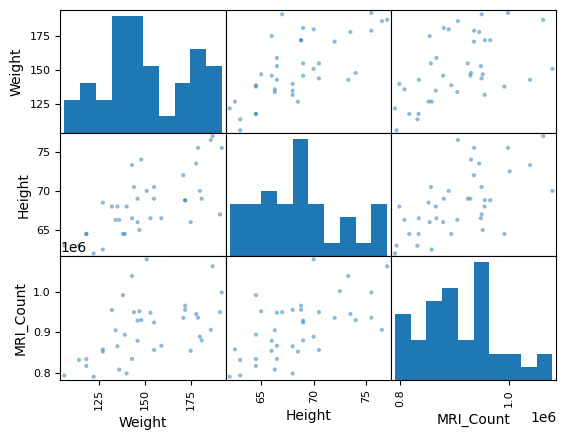

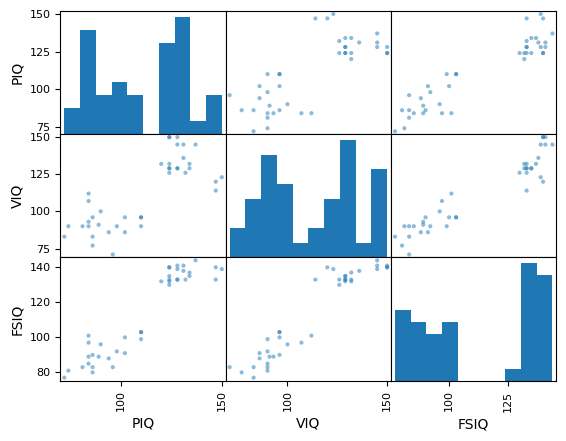

In [38]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Scatter matrices para diferentes columnas
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
plt.show()